# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
#observe the data
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


(array([0.06837607, 0.06837607, 0.06837607, 0.13675214, 0.30769231,
        0.20512821, 0.34188034, 0.54700855, 0.61538462, 0.41025641,
        0.61538462, 0.41025641, 0.37606838, 0.13675214, 0.03418803,
        0.        , 0.06837607, 0.        , 0.        , 0.03418803]),
 array([ 96.3  ,  96.525,  96.75 ,  96.975,  97.2  ,  97.425,  97.65 ,
         97.875,  98.1  ,  98.325,  98.55 ,  98.775,  99.   ,  99.225,
         99.45 ,  99.675,  99.9  , 100.125, 100.35 , 100.575, 100.8  ]),
 <a list of 20 Patch objects>)

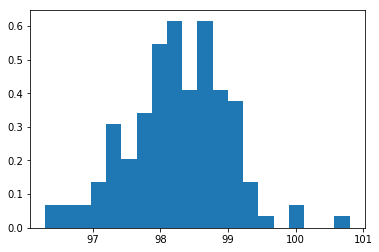

In [3]:
plt.hist(df['temperature'], bins=20, density=True)

In [4]:
#Find if the data is normal
p_avtemp = np.sum(df['temperature'] == 98.6) / len(df['temperature'])
sample_size = len(df['temperature'])
print(sample_size * p_avtemp)

print(sample_size * (1 - p_avtemp))

10.0
120.0


In [5]:
#The normal condition is met since both n * p >= 10 && n * (1 - p) >= 10

In [6]:
'''
Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
'''
print(sample_size)

130


In [7]:
#The sample size is > 30 which means it's has a large enough sample size
#The sample is independent because it is less than 10% of the total population

In [8]:
'''
Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
Now try using the other test. How is the result be different? Why?

'''
#Bootstrap hypothesis test
#H_o: The population mean is 98.6 degrees
#H_a: The population mean is not 98.6 degrees
#Significance level: 5%
#T-statistic: mean
mean = np.mean(df['temperature'])
mean

98.24923076923078

In [9]:
#shift mean to 98.6
shifted_temp = df['temperature'] + (98.6 - mean)

In [10]:
def draw_bootstrap_samples(data):
    bootstrap_samples =  np.random.choice(data, size=len(data), replace=True)
    return bootstrap_samples

In [11]:
#Calculate Bootstrap replicates from data
def draw_bootstrap_replicates(data, func, size):
    #Create empty array to fill 
    bootstrap_replicates = np.empty(size)
    #Fill the array with the desired replicate
    for i in range(size):
        bootstrap_replicates[i] = func(draw_bootstrap_samples(data))
    return bootstrap_replicates

In [12]:
#Get the bootstrap replicates of the mean temperature
temperature_mean_replicates = draw_bootstrap_replicates(shifted_temp, np.mean, 10000)

In [13]:
#Get the mean of the bootstrap replicates
np.mean(temperature_mean_replicates)

98.59910907692306

In [14]:
"""Compute ECDF for a one-dimensional array of measurements."""
def ecdf(data):
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y


In [15]:
#Create ecdf of the bootstrap replicates
temp_x, temp_y = ecdf(temperature_mean_replicates)

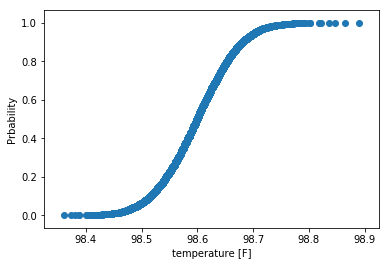

In [16]:
plt.scatter(temp_x, temp_y)
plt.xlabel('temperature [F]')
plt.ylabel('Prbability')
plt.show()

In [17]:
#Calculate the probability the mean of the samples will not be 98.6 F
p_value = np.sum(temperature_mean_replicates >= 98.6) / len(temperature_mean_replicates)

In [18]:
#p-value > .05 so cannot reject the null hypothesis
p_value

0.496

(array([0.01516035, 0.04169096, 0.20466472, 0.49271137, 1.19766764,
        2.2361516 , 3.72186589, 4.90816327, 5.97317784, 6.10204082,
        5.18862974, 3.75218659, 2.21720117, 1.14081633, 0.43965015,
        0.20466472, 0.03790087, 0.01137026, 0.00758017, 0.00758017]),
 array([98.36153846, 98.38792308, 98.41430769, 98.44069231, 98.46707692,
        98.49346154, 98.51984615, 98.54623077, 98.57261538, 98.599     ,
        98.62538462, 98.65176923, 98.67815385, 98.70453846, 98.73092308,
        98.75730769, 98.78369231, 98.81007692, 98.83646154, 98.86284615,
        98.88923077]),
 <a list of 20 Patch objects>)

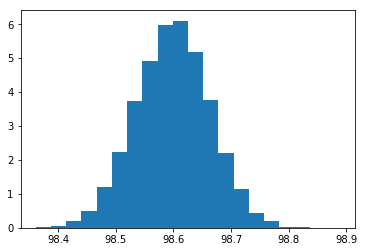

In [19]:
plt.hist(temperature_mean_replicates, density=True, bins=20)

In [20]:
#calculate the difference of means, data should be filled with mean replicates
def difference_of_means(data, mean):
    size = len(data)
    diff_means = data - mean
    return diff_means

In [21]:
difference_temp_mean = difference_of_means(temperature_mean_replicates, mean)

In [22]:
p_value = np.sum(difference_temp_mean >= (98.6 - mean)) / len(difference_temp_mean)

In [23]:
p_value

0.496

In [24]:
'''frequentist statistical testing'''
#get the standard deviation of our sampling distribution assuming h_o is true
std = np.std(df['temperature']) / np.sqrt(len(df['temperature']))

In [25]:
std

0.06405661469519336

In [26]:
#calculate the z score
z_score = (98.6 - mean) / std

In [27]:
z_score

5.475925202078116

In [28]:
import scipy.stats as st
p_values = st.norm.sf(z_score)*2

In [29]:
p_values

4.3523151658821886e-08

Since P < 0.05 Null hypothesis is rejected

In [35]:
#Compare Z-statistic and t-statistic
signal = mean - 98.6
t_val = signal / std
t_val

-5.475925202078116

In [38]:
#Critical t-value
critical_t = st.t.ppf(1-0.025, 129)
critical_t

1.978524491458605

In [39]:
moe_t = critical_t * std
moe_t

0.12673758101436725

In [41]:
#Critical z-value for 2-tail, 97.5%
critical_z = st.norm.ppf(0.975)
critical_z

1.959963984540054

In [42]:
moe_z = std*critical_z
moe_z

0.12554865777413815

In [43]:
#The range of the true mean with 95% confidence level
upper_z_mean = mean + moe_z
lower_z_mean = mean - moe_z
#Range of true mean with t-statistic
upper_t_mean = mean + moe_t
lower_t_mean = mean - moe_t

In [49]:
print("range of true mean with z-statistic is:\n", round(upper_z_mean, 3), round(lower_z_mean, 3))

range of true mean with z-statistic is:
 98.375 98.124


In [50]:
print("range of true mean with t-statistic is:\n", round(upper_t_mean,3), round(lower_t_mean, 3))

range of true mean with t-statistic is:
 98.376 98.122


t-statistic and z-statistic give very similar values due to the large sample size of the data, with data > 30, they will give same results

<H3> What temperature should we consider to be "abnormal"?</H3>

In [54]:
#calculate margin of error and confidence interval, 95% CI
moe_z = 1.96 * std
ci = np.array([mean-moe_z, mean+moe_z])
ci

array([98.1236798 , 98.37478173])

In [59]:
print("Normal Temperature Range:", round(ci[0], 2), "to", round(ci[1], 2), "Temperature")
print("outside of this range would be considered abnormal")

Normal Temperature Range: 98.12 to 98.37 Temperature
outside of this range would be considered abnormal


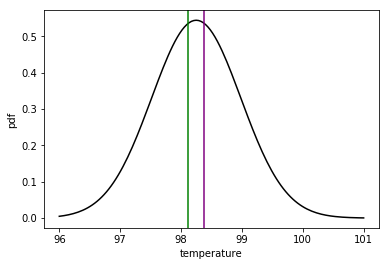

In [71]:
x = np.linspace(96, 101, 130)
y = st.norm.pdf(x, loc=mean, scale=df.temperature.std())
plt.plot(x, y, color='black')
plt.xlabel('temperature')
plt.ylabel('pdf')
plt.axvline(x=98.12, color='green')
plt.axvline(x=98.38, color='purple')
plt.show()

<h3> Is there a significant difference between male and female temperature?" </h3>

In [75]:
male = df[df['gender'] == 'M']
female = df[df['gender'] == 'F']
print("male shape", male.shape)
print("female shape", female.shape)

male shape (65, 3)
female shape (65, 3)


In [77]:
male.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [78]:
female.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


In [80]:
male_mean = male['temperature'].mean()
print("male mean:", male_mean)
male_std = male['temperature'].std()
print("male std:", male_std)
female_mean = female['temperature'].mean()
print("female mean:", female_mean)
female_std = female['temperature'].std()
print("female std:", female_std)

male mean: 98.1046153846154
male std: 0.6987557623265908
female mean: 98.39384615384613
female std: 0.7434877527313665


In [83]:
#difference of means 
diff_mean = abs(male_mean - female_mean)
diff_mean

0.289230769230727

In [87]:
#Standard Error
SE = np.sqrt((male_std**2) / 65 + (female_std**2)/65)
SE

0.12655395041982642

In [88]:
#get degrees of freedom
f1 = female_std**2 / 65
m1 = male_std**2 / 65

deg_freedom = ((f1 + m1)**2) / (((f1**2) / 64) + ((m1**2) / 64))
deg_freedom

127.5103008303909

In [90]:
#Significance level: 0.05, two sample t - test
t_val = (diff_mean - 0) / SE
t_val

2.285434538165274

In [92]:
#p-val, two-sided
p_value = st.t.sf(t_val, 128)*2 
p_value

0.023931883122415926

Since the p-value we got from the difference between Males and Females body temperature was less than our set significance level, we must reject the null hypothesis. So we can say that their is a significant difference between male and female body temperature